# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import BatchNormalization

# Importing Data

In [2]:
img_array = cv2.imread("images/train/angry/0.jpg")

In [3]:
img_array.shape

(48, 48, 3)

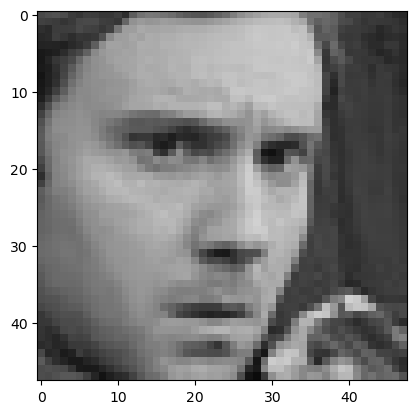

In [4]:
plt.imshow(img_array)

In [5]:
Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]

In [6]:
# path for train data and validation data
TrainDirectory  = "images/train/"
ValidateDirectory = "images/validation/"

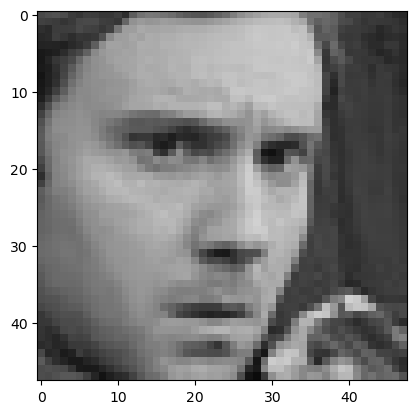

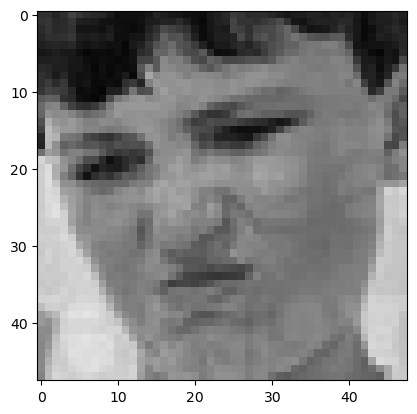

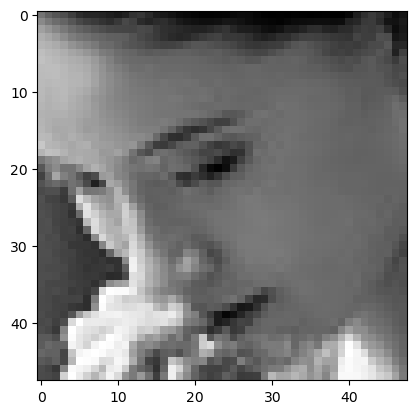

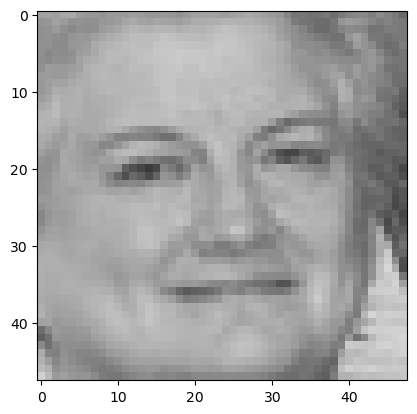

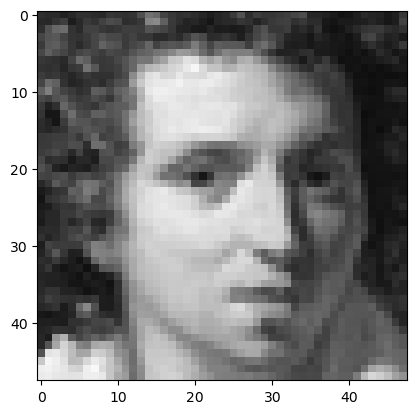

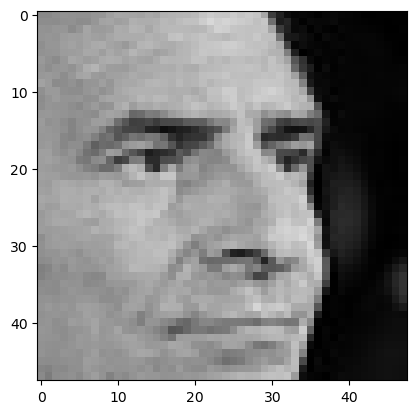

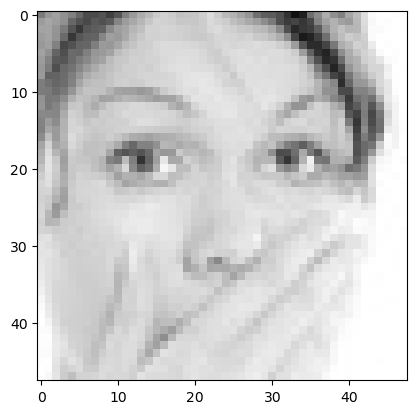

In [7]:
# lets have a look at the images in each each
for Category in Classes:
    path = os.path.join(TrainDirectory, Category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break

# Data Analysis

In [8]:
img_shape = 224

In [9]:
# Resizing the image
new_array = cv2.resize(img_array,(img_shape,img_shape))

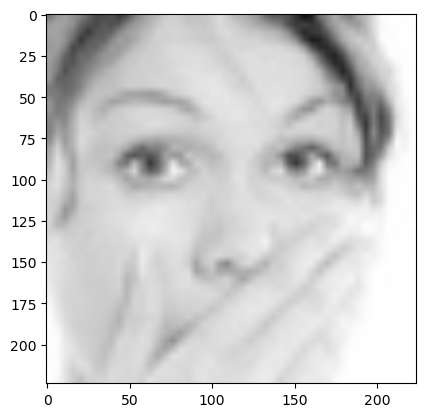

In [10]:
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
# Lets define a function that converts the data into array format
Training_data = []
Validation_data = []

def create_data(DataDirectory,data,Classes):
    for Category in Classes:
        path = os.path.join(DataDirectory,Category)
        class_num = Classes.index(Category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_shape,img_shape))
                data.append([new_array,class_num])
            except Exception as e:
                pass

In [13]:
# creating training data
create_data(TrainDirectory,Training_data,Classes)

In [14]:
len(Training_data)

28821

In [15]:
# creating validation data
create_data(ValidateDirectory,Validation_data,Classes)

In [16]:
len(Validation_data)

7066

In [17]:
# shuffling the data
import random
random.shuffle(Training_data)
random.shuffle(Validation_data)

In [18]:
Training_data[0][1]

5

In [19]:
Validation_data[0][1]

3

In [20]:
# splitting the data into X_train and y_train
X_train = []
y_train = []

for features,labels in Training_data:
    X_train.append(features)
    y_train.append(labels)
    
X_train = np.array(X_train).reshape(-1,img_shape,img_shape,3)

In [21]:
# splitting the data into X_validation and y_validation
X_validation = []
y_validation = []

for features,labels in Validation_data:
    X_validation.append(features)
    y_validation.append(labels)
    
X_validation = np.array(X_train).reshape(-1,img_shape,img_shape,3)

In [22]:
X_train.shape

(28821, 224, 224, 3)

In [23]:
X_train[1]

array([[[ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 63,  63,  63],
        [ 63,  63,  63],
        [ 62,  62,  62],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       ...,

       [[118, 118, 118],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 33,  33,  33],
        [ 32,  32,  32],
        [ 32,  32,  32]],

       [[118, 118, 118],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 33,  33,  33],
        [ 32,  32,  32],
        [ 32,  32,  32]],

       [[118, 118, 118],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 33,  33,  33],
        [ 32,  32,  32],
        [ 32,  32,  32]]

In [24]:
type(X_train)

numpy.ndarray

In [25]:
type(y_train)

list

In [26]:
# converting the y_train into numpy array format
y_train = np.array(y_train)

In [27]:
type(y_train)

numpy.ndarray

In [28]:
y_train[1]

3

In [29]:
import pandas as pd
df = pd.DataFrame(y_train,columns= ['Class'])

In [30]:
df.head()

,Class
0,5
1,3
2,3
3,2
4,2


In [31]:
# Lets check the count of images in each class
df['Class'].value_counts()

Class
3    7164
4    4982
5    4938
2    4103
0    3993
6    3205
1     436
Name: count, dtype: int64

In [32]:
df['Class'] = df['Class'].apply(lambda x:'angry' if x == 0 else 'disgust' if x == 1 else 'fear' if x == 2 else 'happy' if x == 3 else 'neutral' if x == 4 else 'sad' if x == 5 else 'surprise')

In [33]:
df['Class'].value_counts()

Class
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

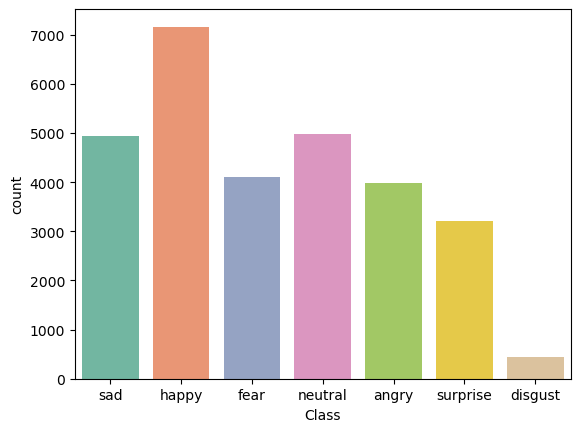

In [35]:
sns.countplot(x ='Class', data = df, palette = "Set2")
 
# Show the plot
plt.show()

# From the above graph we can clearly interpret the count of images in each class, happy class has the highest count of images

In [36]:
# Import Train data and preprocess the images

path = "C:/Users/junnu/Desktop/Final project/Emotion Recognition using pycharm/images/"

# First the value of each pixel will be in the range 0 to 255.
# Now we will Normalize the pixel vale by rescaling it.
# After rescaling the pixel value lies between 0 to 1.
traindata_generate = ImageDataGenerator(rescale = 1.0 / 255.0)

# target_size represents the image size and here it is 224*224.
# consider batch_size as 64.

train_data = traindata_generate.flow_from_directory(path+"train",
    target_size = (224,224),
    batch_size = 64,
    #color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 28821 images belonging to 7 classes.


In [37]:
# Import Validation Data and preprocess the images

validateData_generate = ImageDataGenerator(rescale = 1.0/255.0)

validate_data = validateData_generate.flow_from_directory(path+"validation",
                                                         target_size = (48,48),
                                                         batch_size = 64,
                                                         #color_mode = "grayscale",
                                                         class_mode = 'categorical')



Found 7066 images belonging to 7 classes.


# Displaying Images

In [38]:
picture_size = 48
folder_path = "C:/Users/junnu/Desktop/Final project/Emotion Recognition using pycharm/images/"

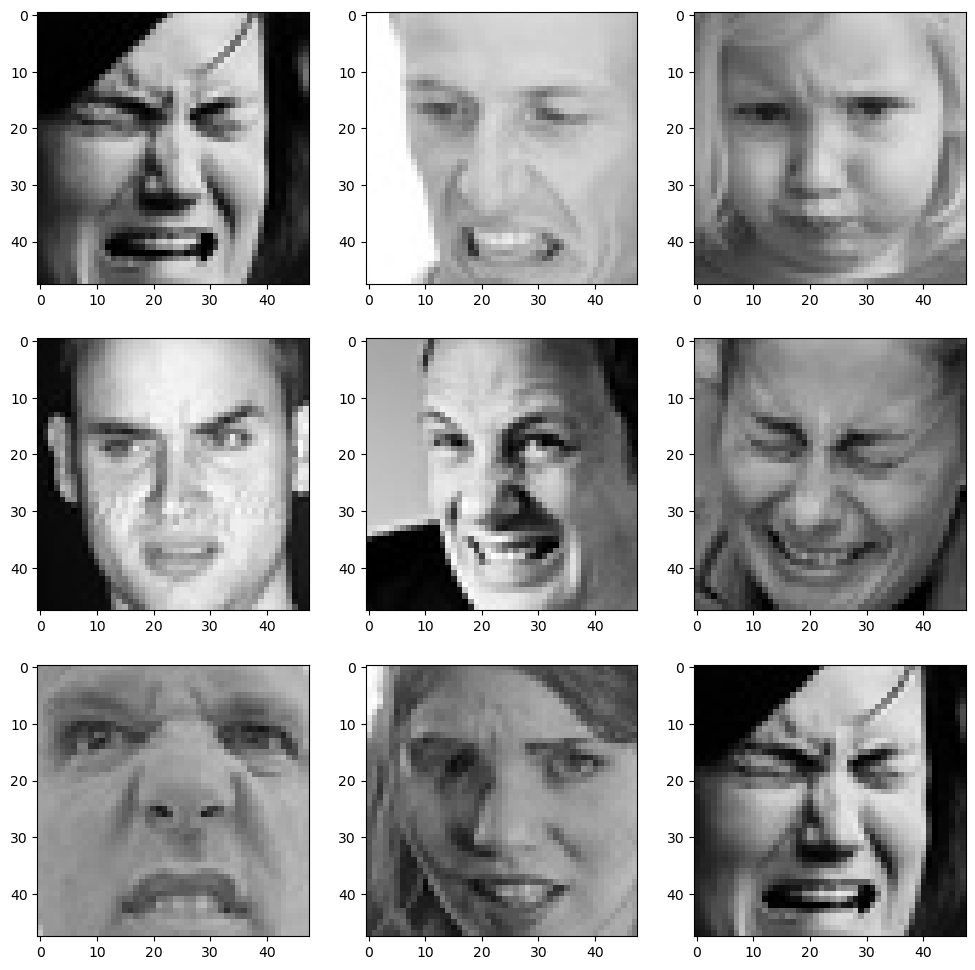

In [39]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

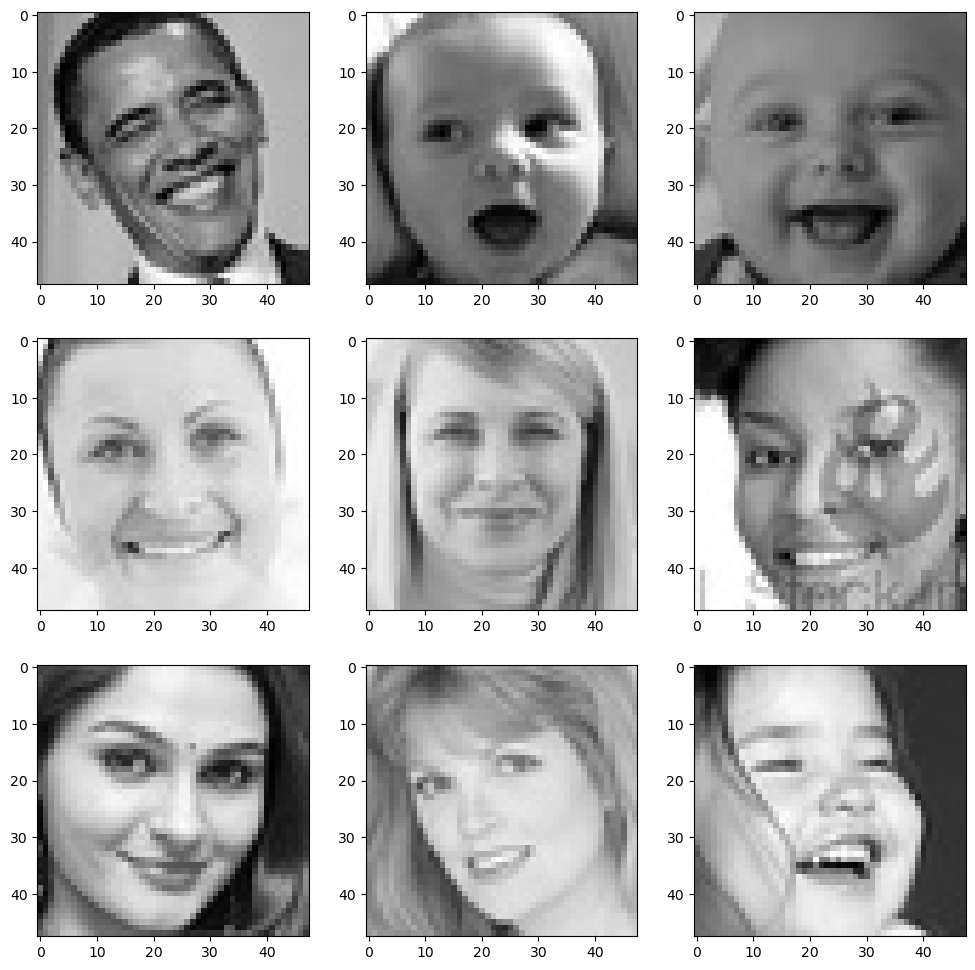

In [40]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Displaying some images for every different expression

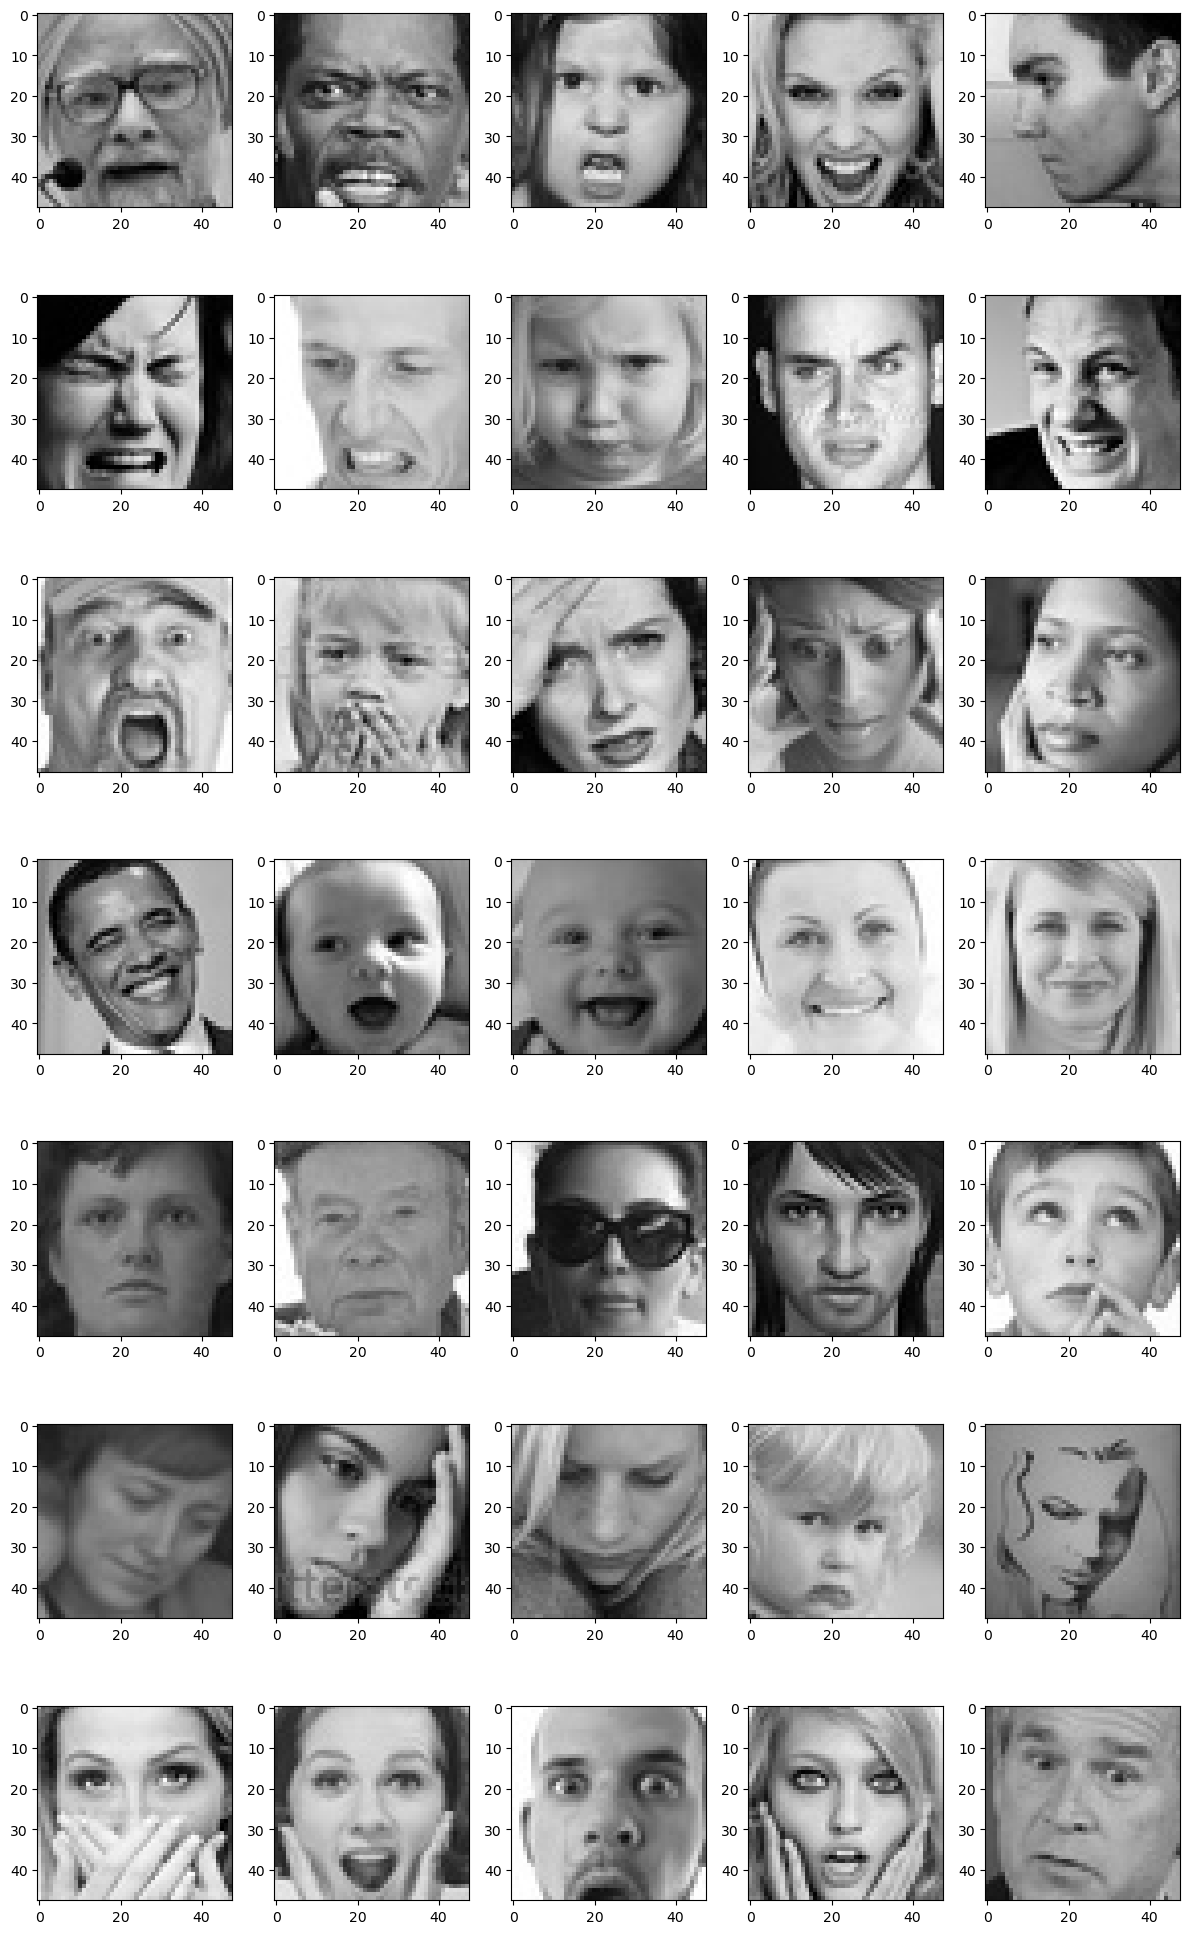

In [41]:

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(folder_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(folder_path + "train/" + expression + "/" +os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

# Making Training and Validation Data

In [42]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [43]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\junnu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# Fitting the Model with Training and Validation Data 

In [44]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [45]:
history = model.fit(x=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


C:\Users\junnu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.2576 - loss: 1.9485 - val_accuracy: 0.3318 - val_loss: 1.8286 - learning_rate: 0.0010
Epoch 2/48


C:\Users\junnu\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/225 ━━━━━━━━━━━━━━━━━━━━ 6:52 2s/step - accuracy: 0.3359 - loss: 1.7524

C:\Users\junnu\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3359 - loss: 1.7524 - val_accuracy: 0.0385 - val_loss: 3.3969 - learning_rate: 0.0010
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.4277 - loss: 1.4962 - val_accuracy: 0.4382 - val_loss: 1.5182 - learning_rate: 0.0010
Epoch 4/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 707us/step - accuracy: 0.5078 - loss: 1.2612 - val_accuracy: 0.2692 - val_loss: 3.1134 - learning_rate: 0.0010
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.4934 - loss: 1.3091 - val_accuracy: 0.5179 - val_loss: 1.2824 - learning_rate: 0.0010
Epoch 6/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4922 - loss: 1.2382 - val_accuracy: 0.5000 - val_loss: 1.4072 - learning_rate: 0.0010
Epoch 7/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.5446 - loss: 1.2023 - val_accuracy: 0.5445 - val_loss: 1.2081 - learning_rate: 0.0010
Epoch 8/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 779us/step - accuracy: 0.5234 - loss: 1.2472 - val_

# Plotting Accuracy & Loss

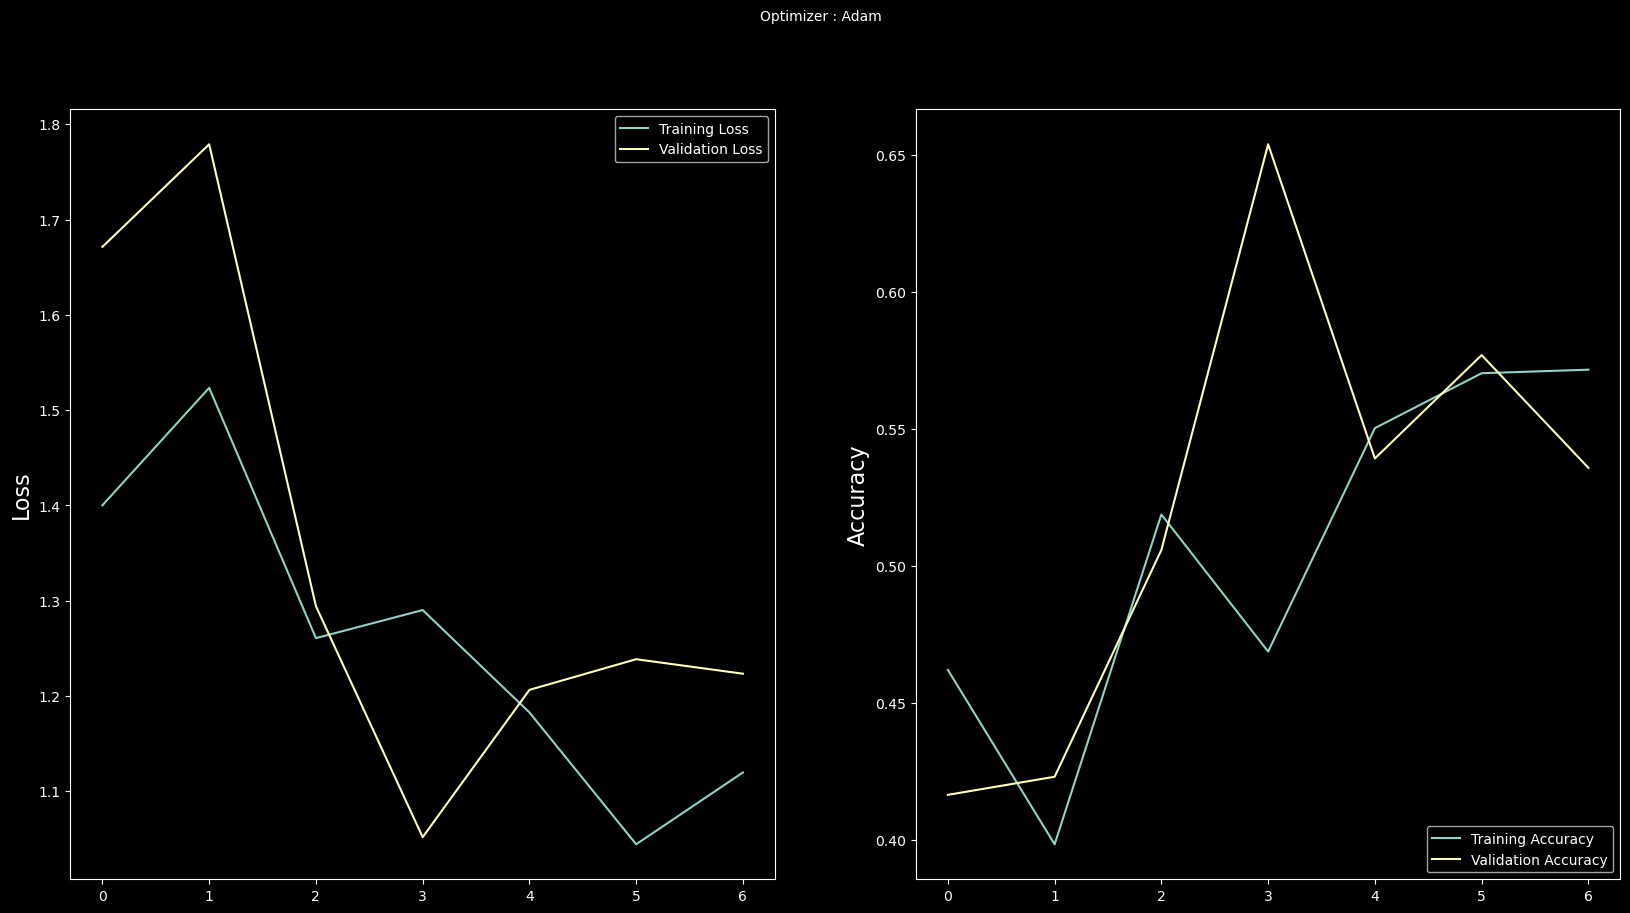

In [63]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()